In [1]:
"""
requirements:
 pip install pandas janome nlpplot matplotlib plotly
"""
import pandas as pd
import nlplot
import pandas as pd
import plotly
from plotly.subplots import make_subplots
from plotly.offline import iplot
import matplotlib.pyplot as plt

import word_wakati as wkt

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

年度 学科／研究科  研究室                                         題目
0  H17  情報科学科  X3研                       WEBページにおけるユーザビリティの追及
1  H17  情報科学科  Z4研  安全運転管理教育システム(ASSIST)における複数カメラ使用での交通事故防止対策
2  H17  情報科学科  Z3研     電子透かしの体制に関する検討 -加重平均フィルタ・メディアンフィルタの場合-
3  H17  情報科学科   A研                      対面教育を支援するためのウェブ助言システム
4  H17  情報科学科   B研            衛星通信検討のための気象データの解析-2002年のデータ解析-

In [3]:
df["研究室"].unique()

array(['X3研', 'Z4研', 'Z3研', 'A研', 'B研', 'X4研', 'C研', 'D研', 'E研', 'F研',
       'G研', 'H研', 'Z8研', 'M研', 'N研', 'P研', 'Z9研', 'Z5研', 'Z6研', 'X1研',
       'X2研', 'Y3研', 'Z1研', 'X6研', 'Q研', 'X7研', 'R研', 'Y1研', 'Y2研研',
       'Y2件', 'Y2研', 'Y4研'], dtype=object)

In [4]:
df["年度"].unique()

array(['H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'H24', 'H25',
       'H26', 'H27', 'H28', 'H29', 'H30', 'R01', 'R02', 'R03', 'R04'],
      dtype=object)

In [5]:
years= df["年度"].unique().tolist()
n_years = len(years) # 18年間
print(n_years)

18


In [6]:
fake_labs=['A研', 'B研', 'C研', 'D研','E研', 'F研', 'G研', 'H研','M研', 'N研', 'P研', 'Q研', 'R研']
print(fake_labs)

['A研', 'B研', 'C研', 'D研', 'E研', 'F研', 'G研', 'H研', 'M研', 'N研', 'P研', 'Q研', 'R研']


In [7]:
%matplotlib inline
targets = ['動詞', '名詞', '形容詞'] #評価対象にする品詞
ignores = ['－', '～', '-', '(', ')', '---', '.','する','ため','用いる','有する'] #無視する記号や単語
mecab = wkt.create_parser(worker='mecab', parts_of_speech=targets, stop_words=ignores)

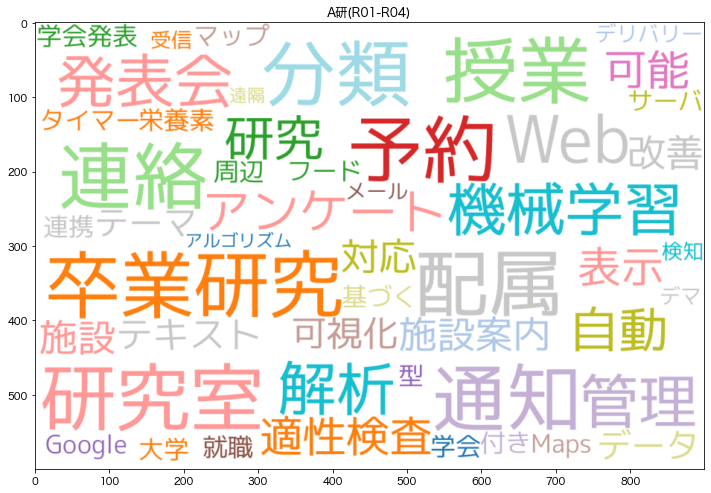

In [8]:
lab, y1, y2 = 'A研', 'R01', 'R04'
lab_ = lab
df1 = None
df1 = df[(df['研究室']==lab) & (df['年度']>=y1) & (df['年度']<=y2)]
titles =  df1.loc[:,['題目']].values
texts =[]
for t in titles:
    texts += [" ".join(wkt.word_seq(t[0], parser=mecab))]
df2 = None
df2 = pd.DataFrame({'text': texts})

npt = nlplot.NLPlot(df2, target_col='text')
# Stopword calculations can be performed.
stopwords = npt.get_stopword(top_n=4, min_freq=0)

fig = plt.figure(figsize=(12, 18))
fig.tight_layout()
fig_wc = npt.wordcloud(
    width = 900,
    height = 600,
    max_words = 50,
    max_font_size = 100,
    colormap = 'tab20_r',
    stopwords =stopwords,
    mask_file = None,
    save=False
)
lab_title = f'{lab_}({y1}-{y2})'
# plt.title(lab_title,fontname="MS Gothic")
plt.title(lab_title)
# plt.axis('off')        
plt.imshow(fig_wc, interpolation="bilinear")      
plt.show()

# fig_unigram = npt.bar_ngram(
#     title=lab_title,
#     xaxis_label='出現回数',
#     yaxis_label='単語',
#     ngram=1,
#     top_n=20,
#     width=800,
#     height=1100,
#     color=None,
#     horizon=True,
#     stopwords=stopwords,
#     verbose=False,
#     save=False,
# )
# fig_unigram.show()

# npt.build_graph(stopwords=stopwords, min_edge_frequency=0)
# # The number of nodes and edges to which this output is plotted.
# # If this number is too large, plotting will take a long time, so adjust the [min_edge_frequency] well.
# # >> node_size:70, edge_size:166
# fig_co_network = npt.co_network(
#     title='Co-occurrence network',
#     sizing=100,
#     node_size='adjacency_frequency',
#     color_palette='hls',
#     width=900,
#     height=500,
#     save=False
# )
# iplot(fig_co_network)

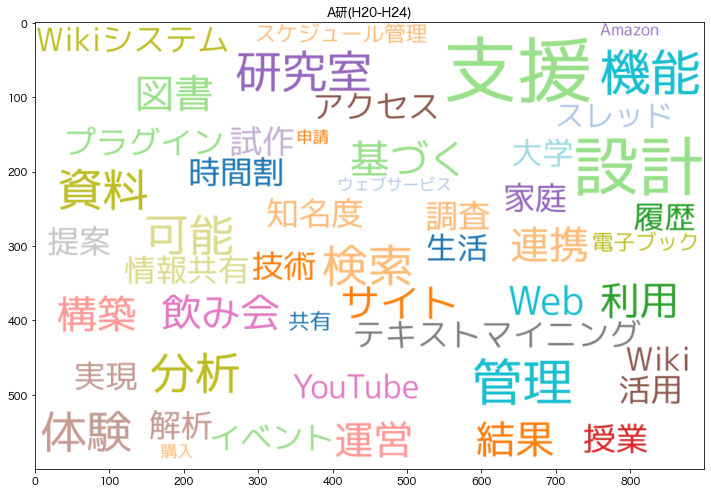

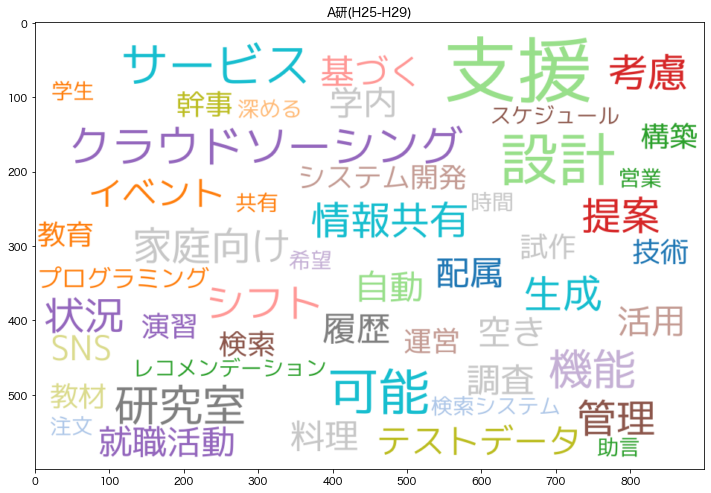

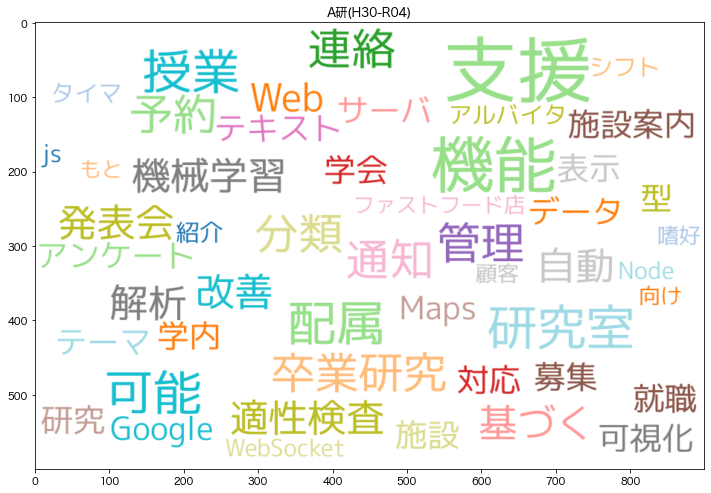

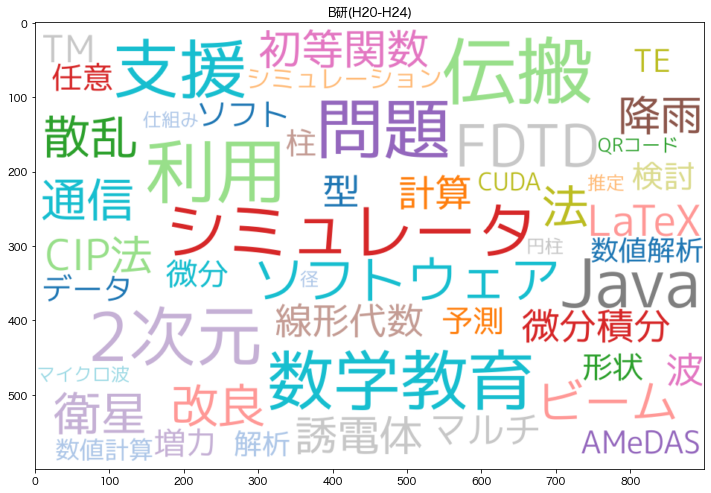

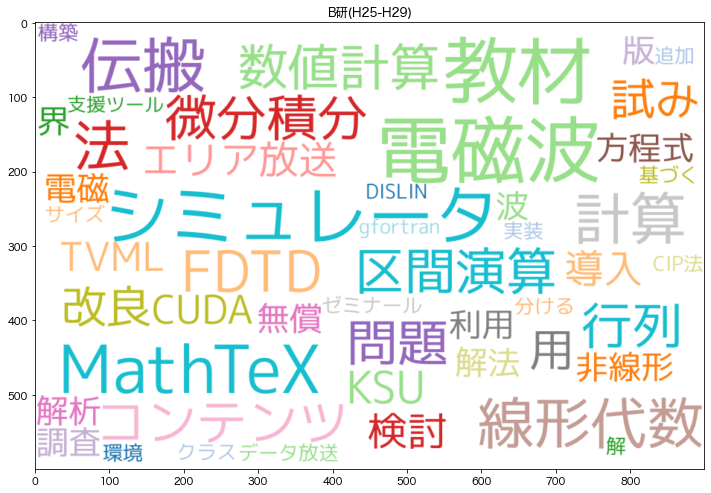

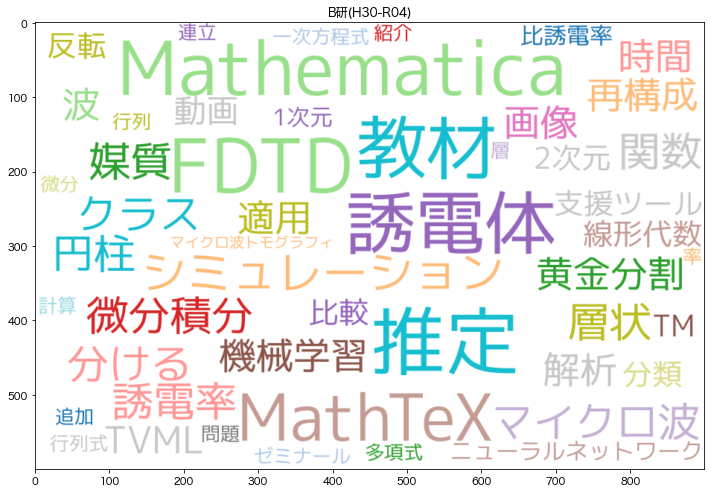

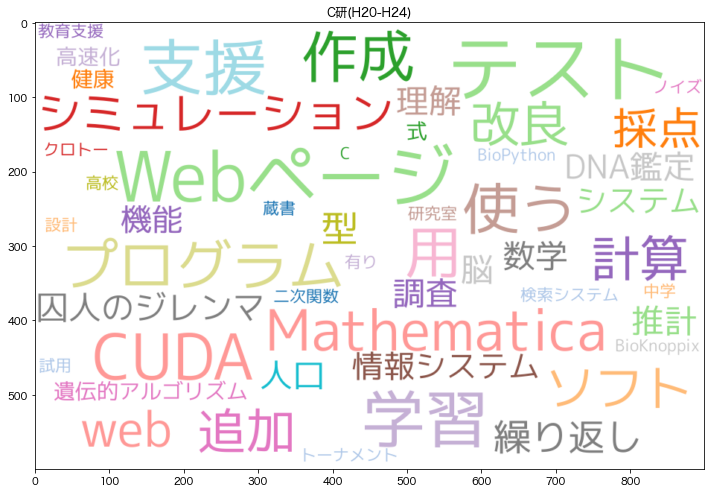

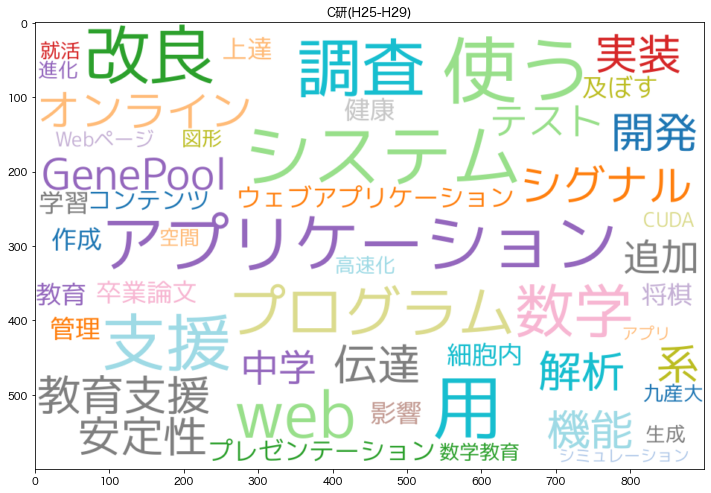

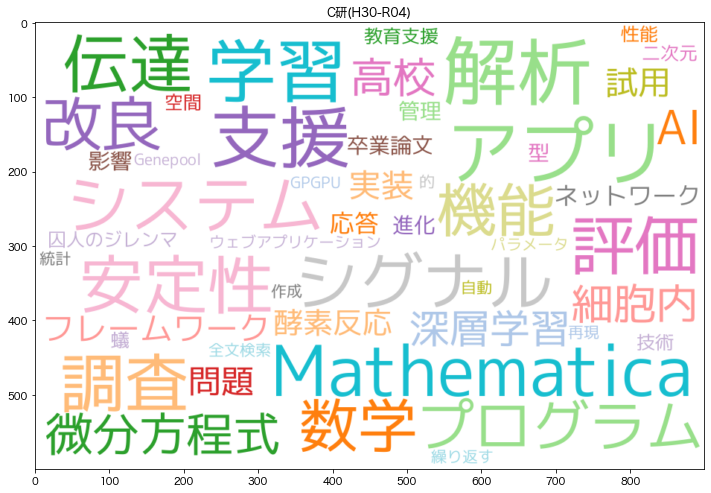

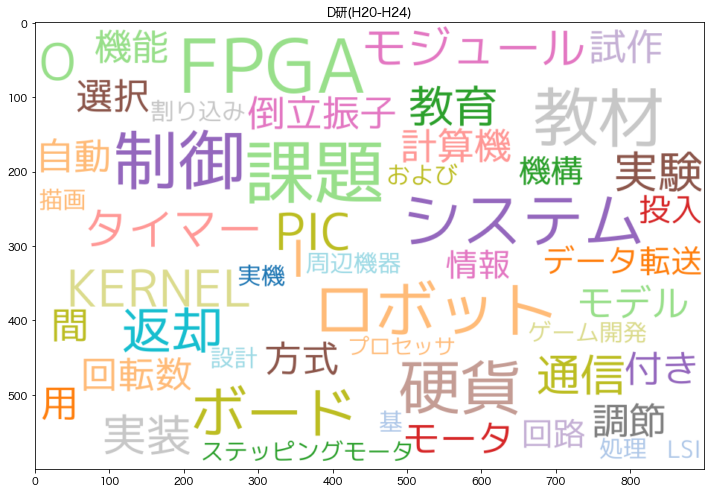

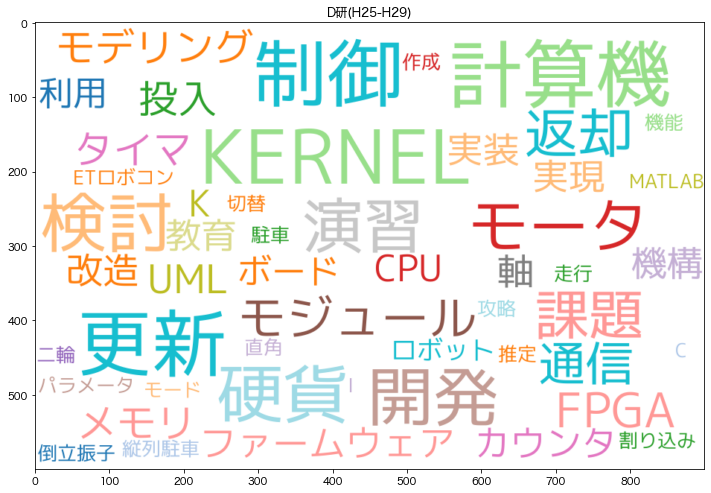

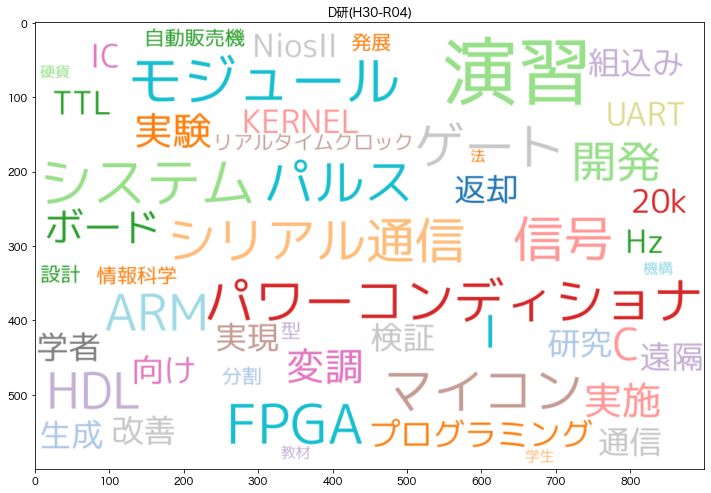

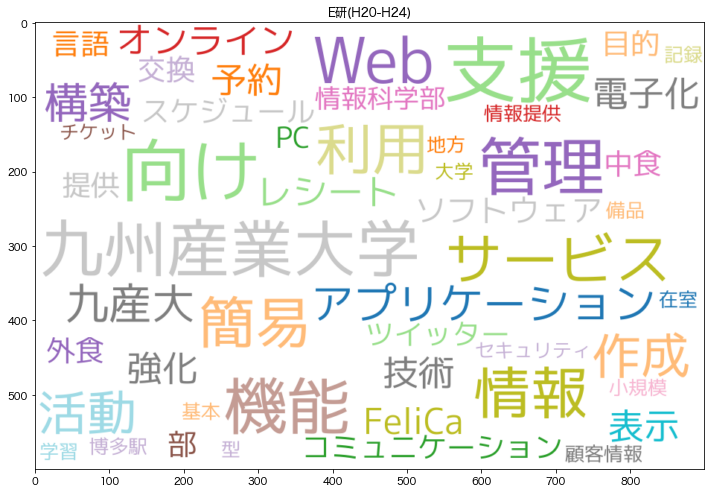

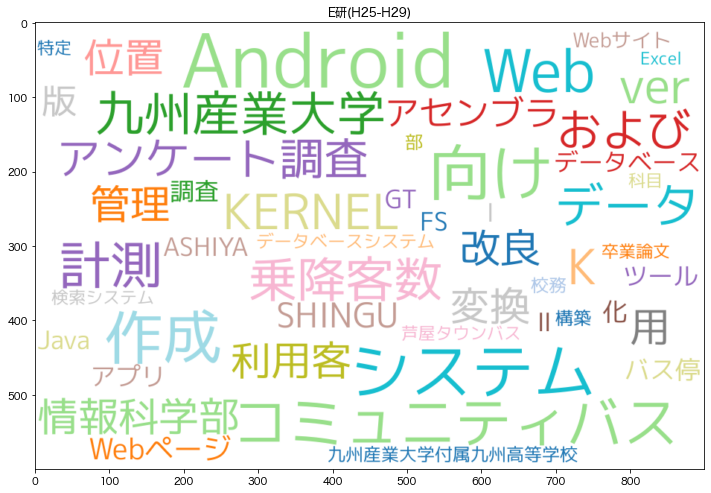

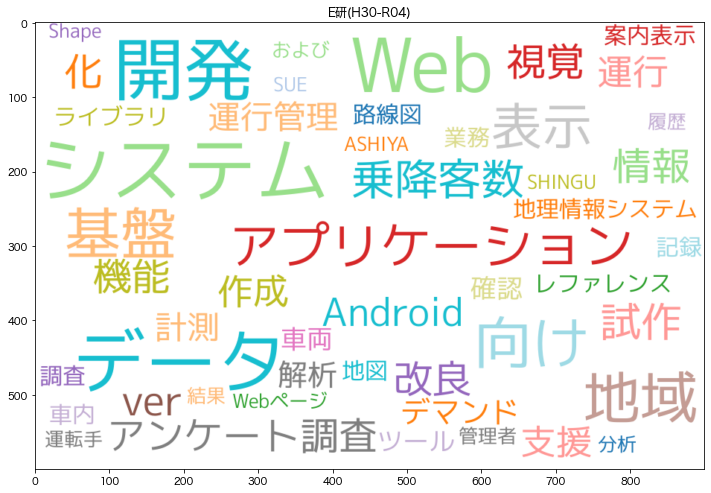

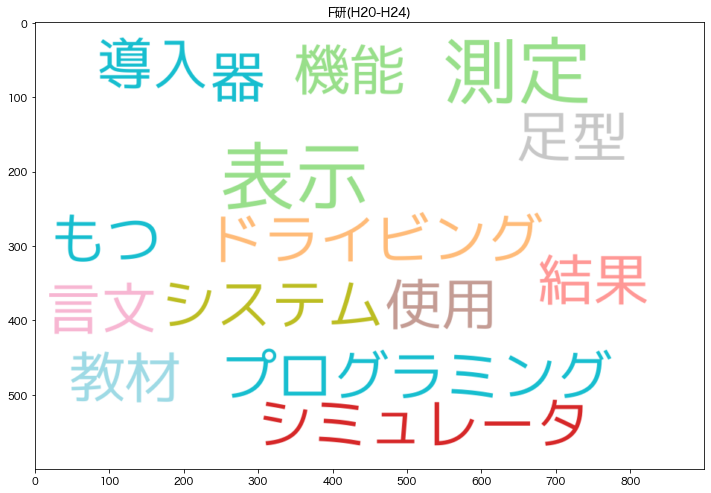

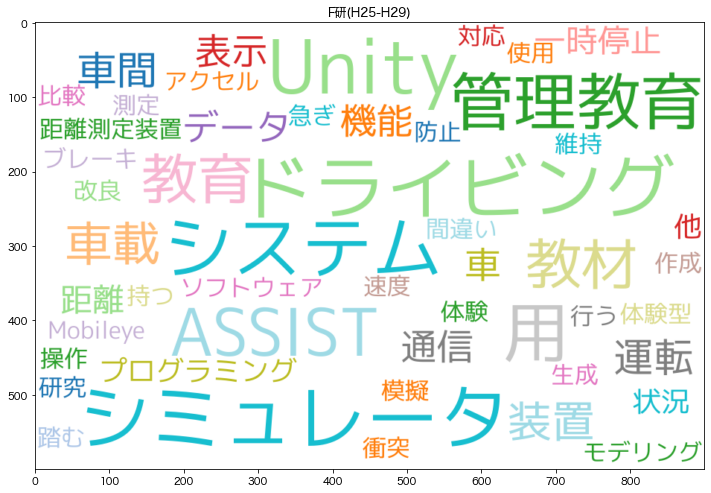

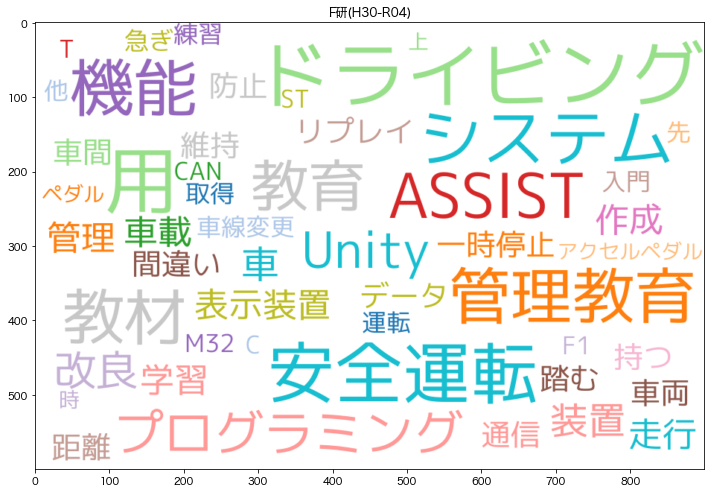

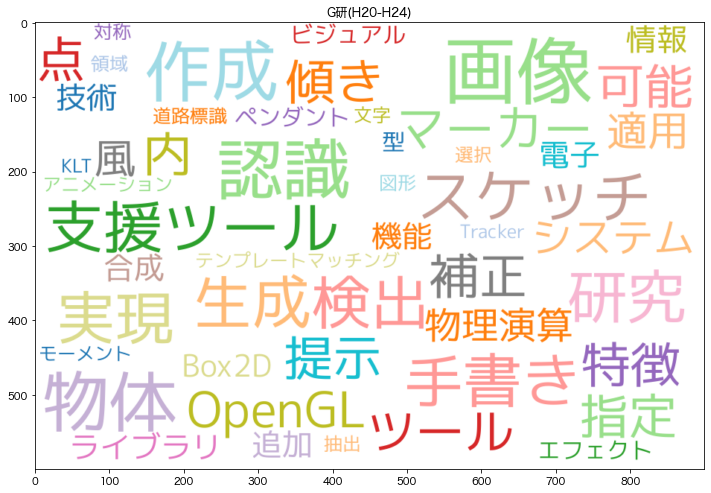

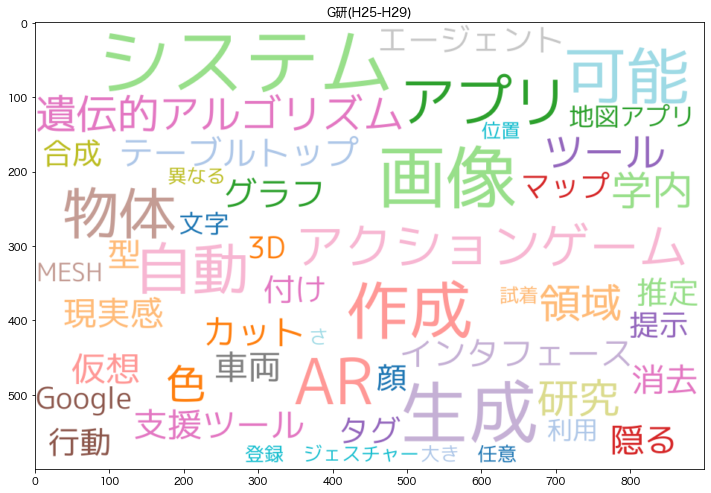

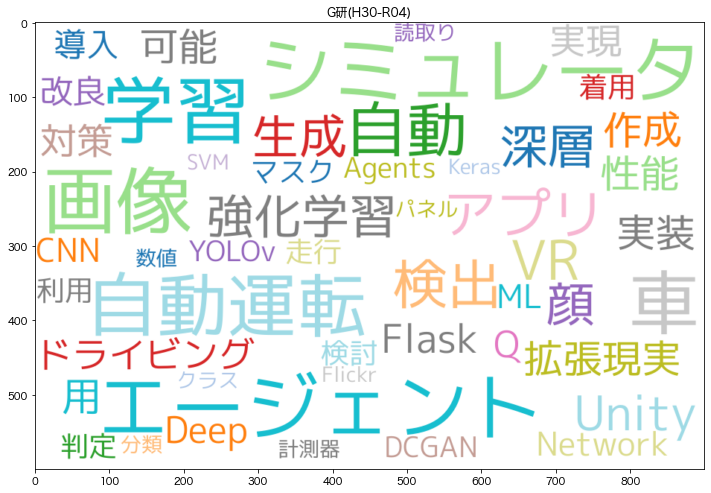

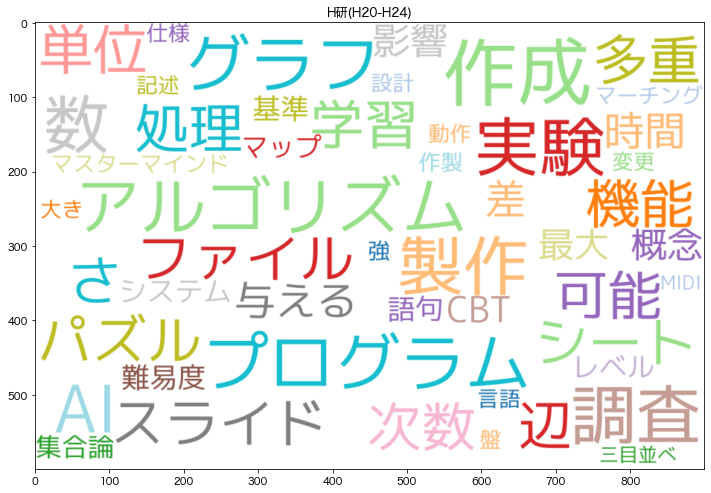

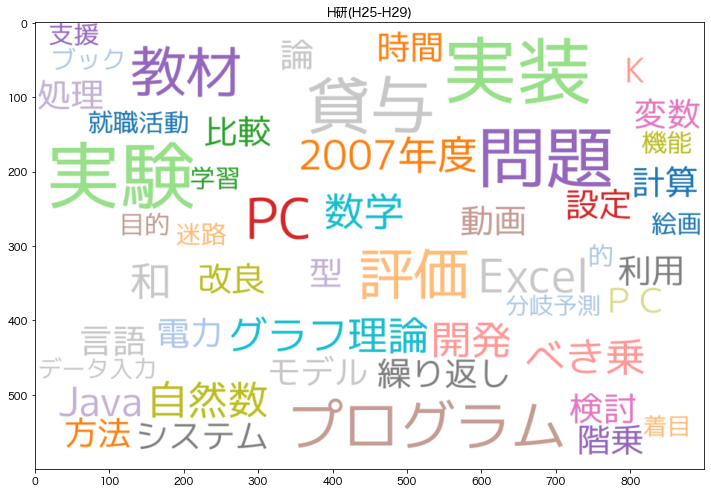

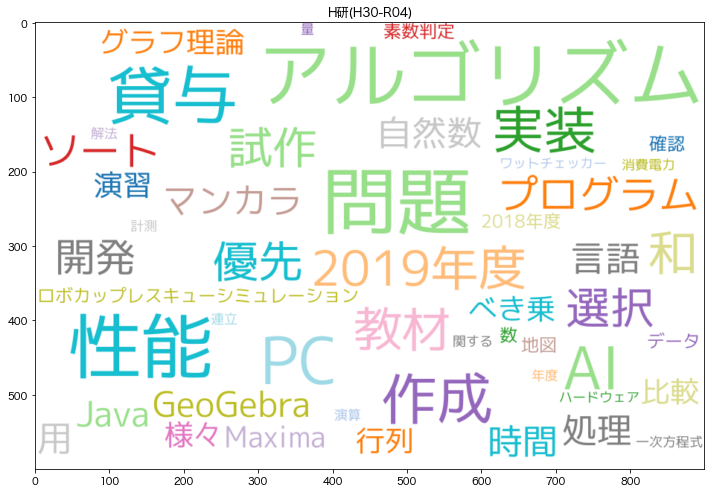

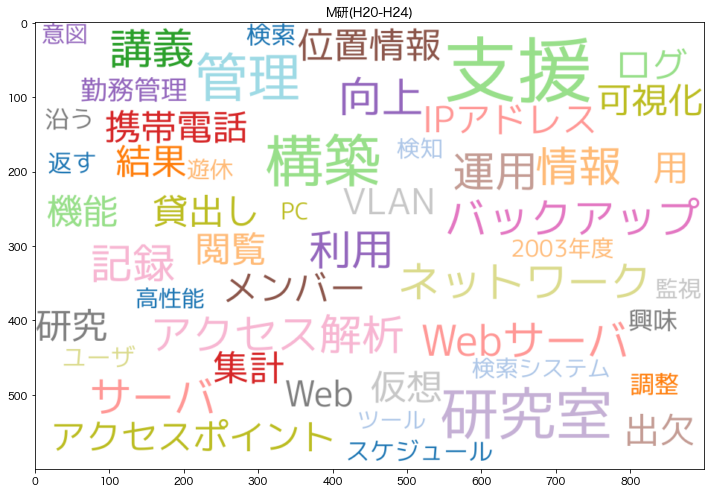

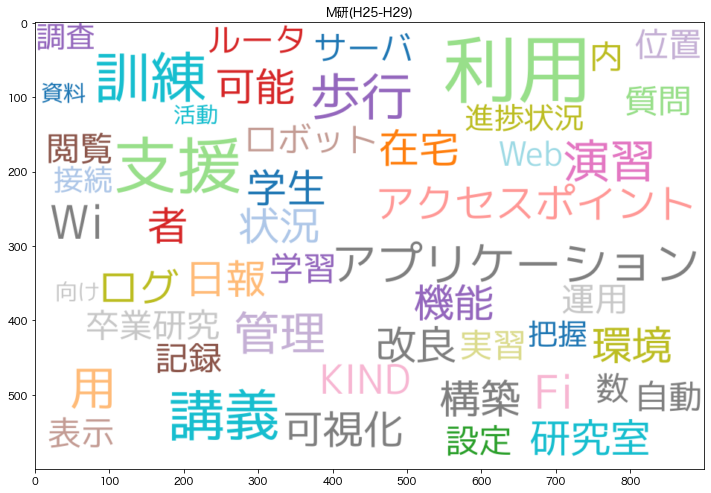

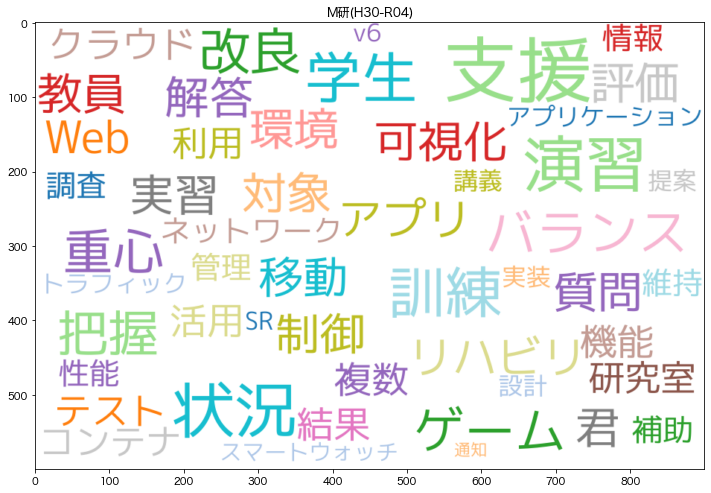

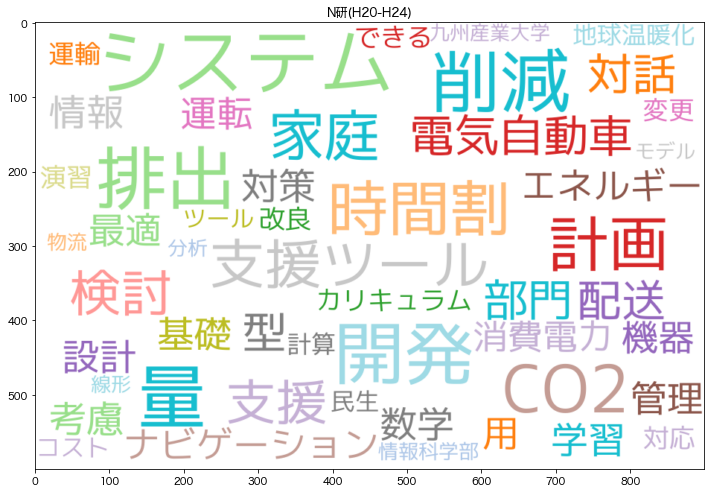

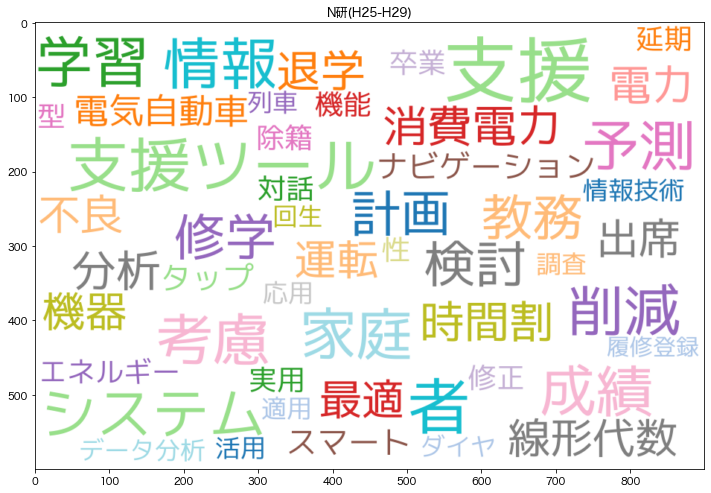

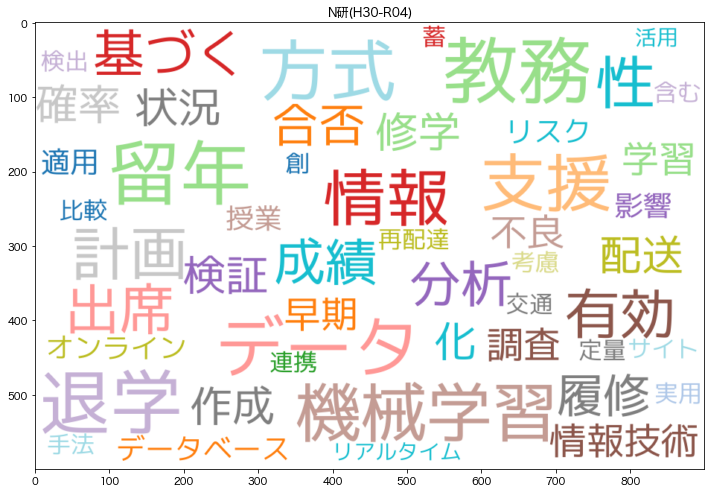

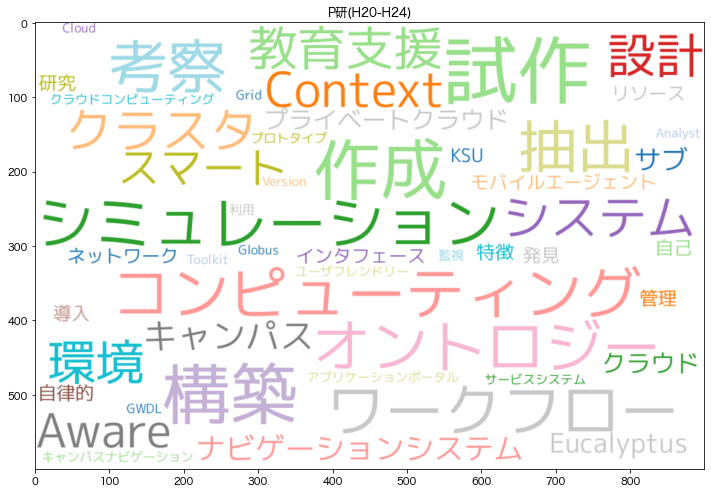

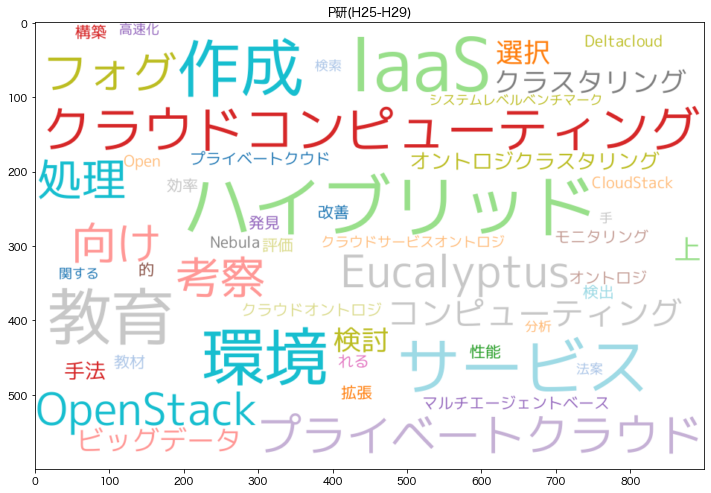

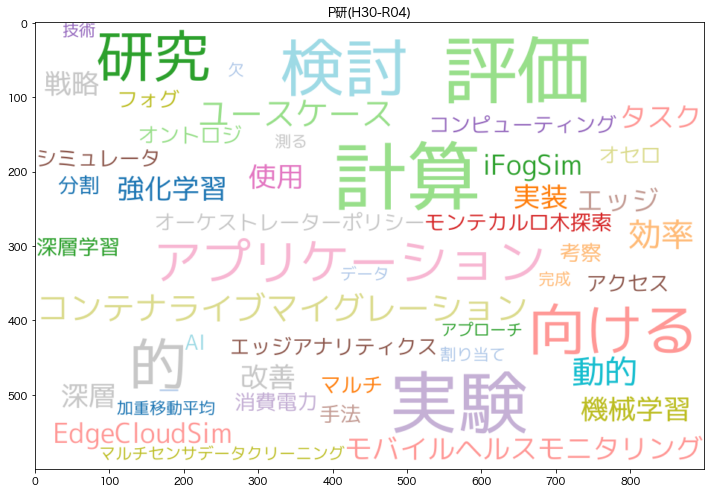

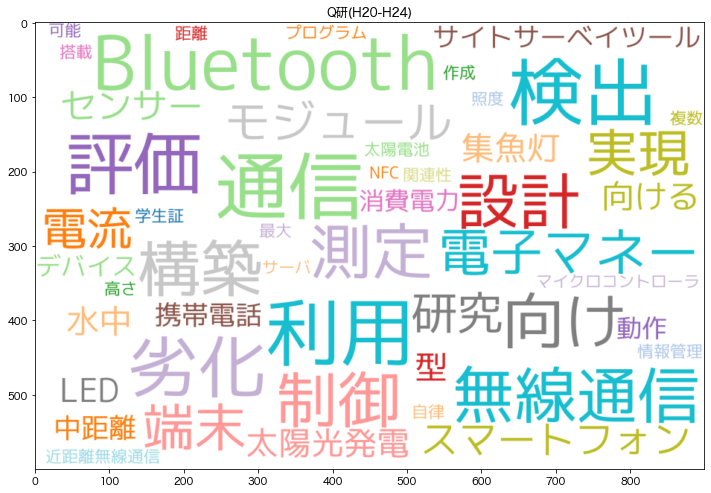

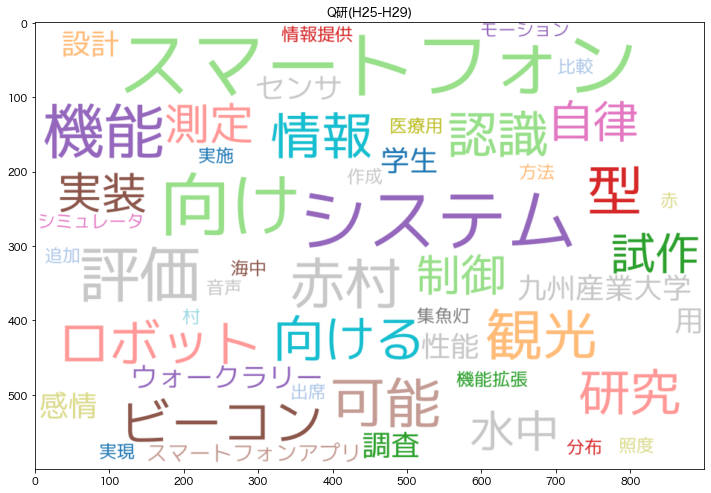

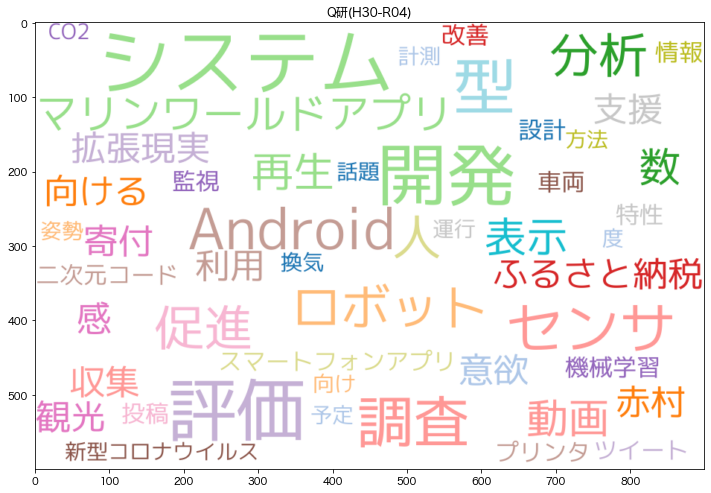

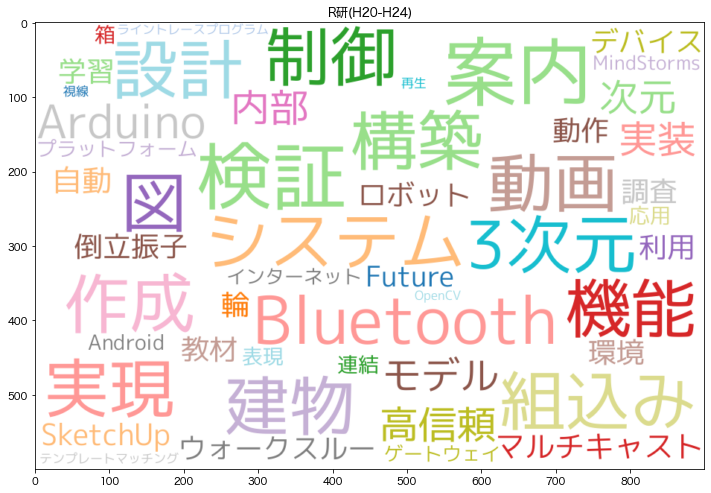

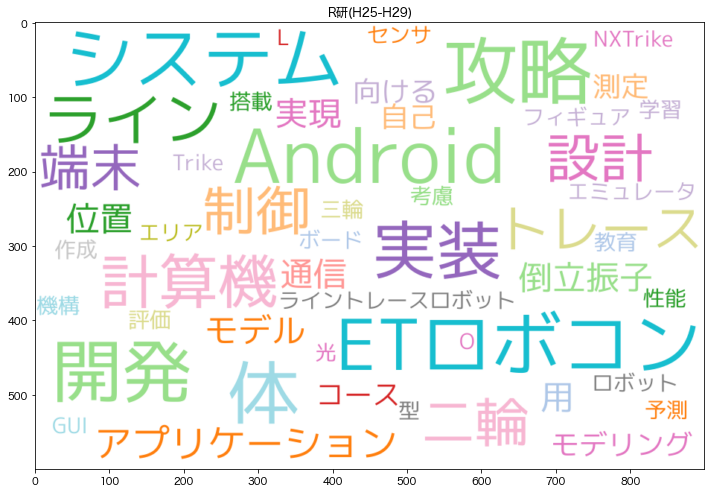

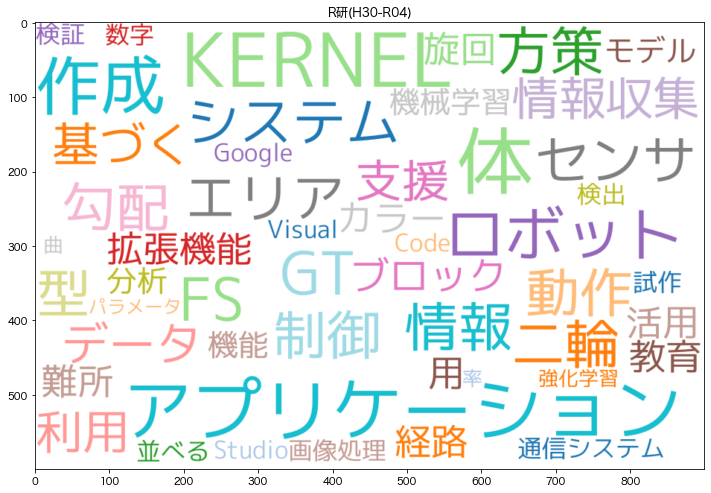

In [9]:
delta = 5 # 調査対象年数 1 3 6 9 18 （必須ではないが18の倍数にする） 
n_div = n_years / delta
m_div = n_years % delta
for lab in fake_labs:
    for y in range(m_div, n_years, delta):
        fig = plt.figure(figsize=(12, 18))
        fig.tight_layout()
        z = y + delta
        z = z - 1 if z - 1 < n_years else n_years-1     
#         print(lab, years[y],years[z])
        lab_ = lab    
        df1 = df[(df['研究室']==lab) & (df['年度']>=years[y]) & (df['年度']<=years[z])]
        titles =  df1.loc[:,['題目']].values
        texts =[]
        for t in titles:
            texts += [" ".join(wkt.word_seq(t[0], parser=mecab))]
        df2 = None
        df2 = pd.DataFrame({'text': texts})
 
        npt = nlplot.NLPlot(df2, target_col='text')
        # Stopword calculations can be performed.
        stopwords = npt.get_stopword(top_n=2, min_freq=0)

        fig_wc = npt.wordcloud(
            width = 900,
            height = 600,
            max_words = 50,
            max_font_size = 100,
            colormap = 'tab20_r',
            stopwords =stopwords,
            mask_file = None,
            save=False
        )
        lab_title = f'{lab_}({years[y]}-{years[z]})'
        # plt.title(lab_title,fontname="MS Gothic")
        plt.title(lab_title)
        # plt.axis('off')        
        plt.imshow(fig_wc, interpolation="bilinear")      
        plt.show()
        
#         fig_unigram = npt.bar_ngram(
#             title=lab_title,
#             xaxis_label='出現回数',
#             yaxis_label='単語',
#             ngram=1,
#             top_n=20,
#             width=800,
#             height=1100,
#             color=None,
#             horizon=True,
#             stopwords=stopwords,
#             verbose=False,
#             save=False,
#         )
#         fig_unigram.show()
